Written By: Isis Vasquez

4/3/2025

# Imports

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# AutoViz
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

# PyCaret
!pip install pycaret
from pycaret.classification import *

# Warnings
import warnings
warnings.filterwarnings('ignore')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


# Input Data

In [ ]:
try:
  df = pd.read_csv('https://raw.githubusercontent.com/Ivasquez2003/Data-Mining-Project/refs/heads/main/train_u6lujuX_CVtuZ9i.csv')
  display(df.head())
except FileNotFoundError:
  print("Error: 'test_Y3wMUE5_7gLdaTN.csv' not found. Please upload the file or provide the correct path.")
except pd.errors.EmptyDataError:
  print("Error: 'test_Y3wMUE5_7gLdaTN.csv' is empty.")
except pd.errors.ParserError:
  print("Error: Could not parse 'test_Y3wMUE5_7gLdaTN.csv'. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring Data

In [ ]:
# Statistical Summary
df.describe()




,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Summary Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Analysis of Nulls
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Shape of your Data Set loaded: (614, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Loan_ID']
To fix these data quality issues in the dataset, import F

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Loan_ID,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gender,object,2.117264,0,,,"13 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Married,object,0.488599,0,,,"3 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Dependents,object,2.442997,0,,,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Education,object,0.000000,0,,,No issue
Self_Employed,object,5.211726,0,,,"32 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ApplicantIncome,int64,0.000000,82,150.000000,81000.000000,Column has 50 outliers greater than upper bound (10171.25) or lower than lower bound(-1498.75). Cap them or remove them.
CoapplicantIncome,float64,0.000000,NA,0.000000,41667.000000,Column has 18 outliers greater than upper bound (5743.12) or lower than lower bound(-3445.88). Cap them or remove them.
LoanAmount,float64,3.583062,NA,9.000000,700.000000,"22 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 39 outliers greater than upper bound (270.00) or lower than lower bound(-2.00). Cap them or remove them."
Loan_Amount_Term,float64,2.280130,NA,12.000000,480.000000,"14 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 88 outliers greater than upper bound (360.00) or lower than lower bound(360.00). Cap them or remove them."


Number of All Scatter Plots = 6


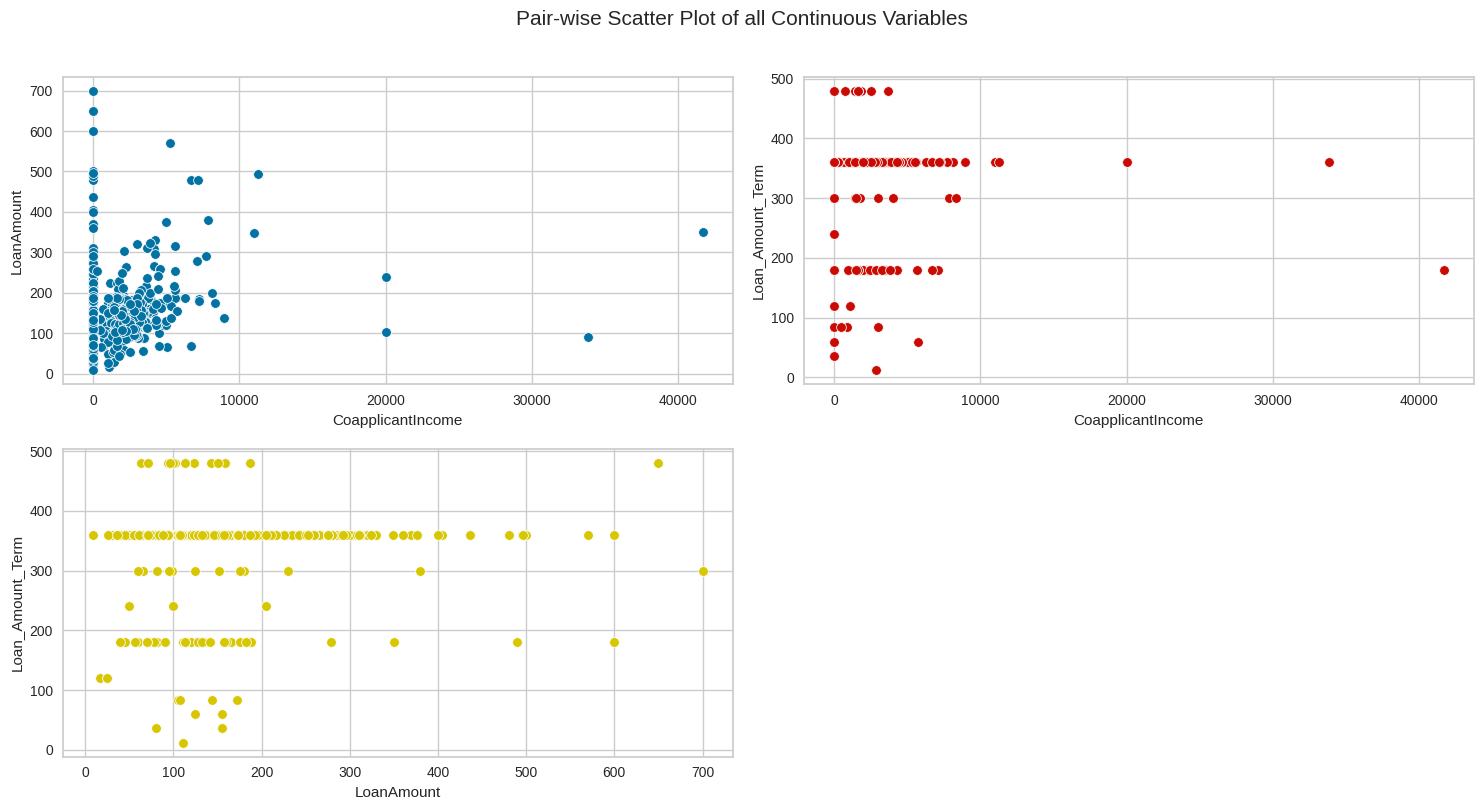

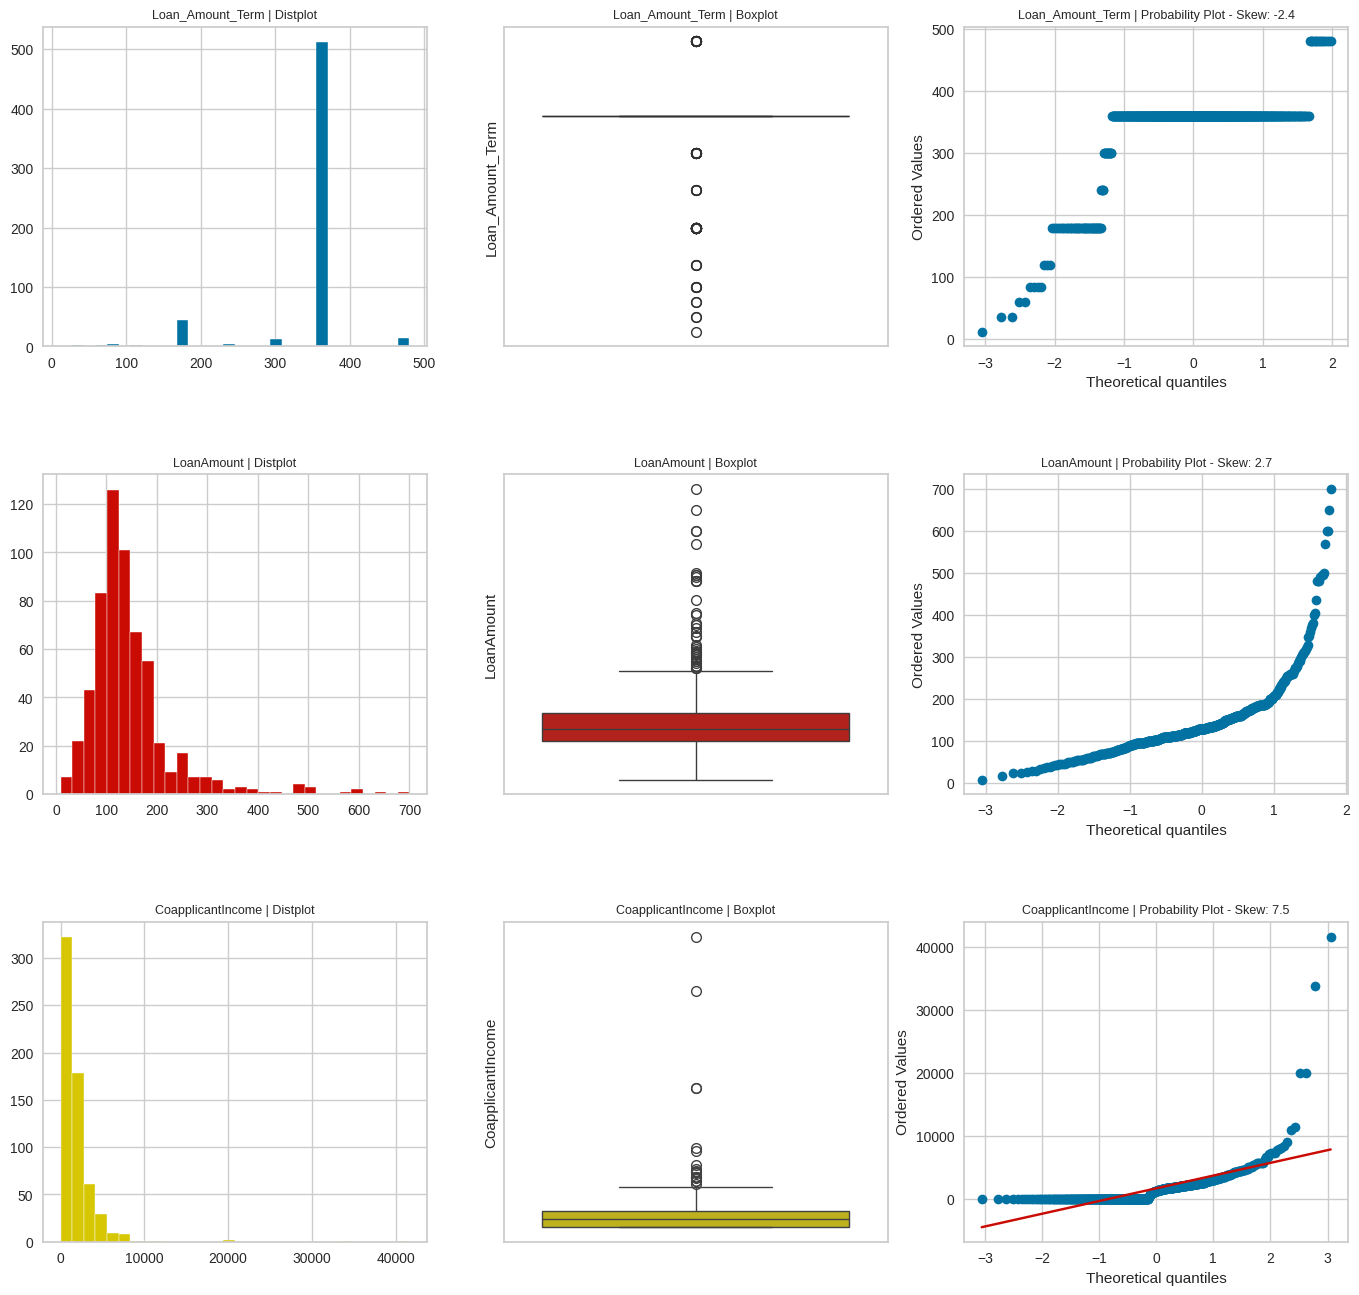

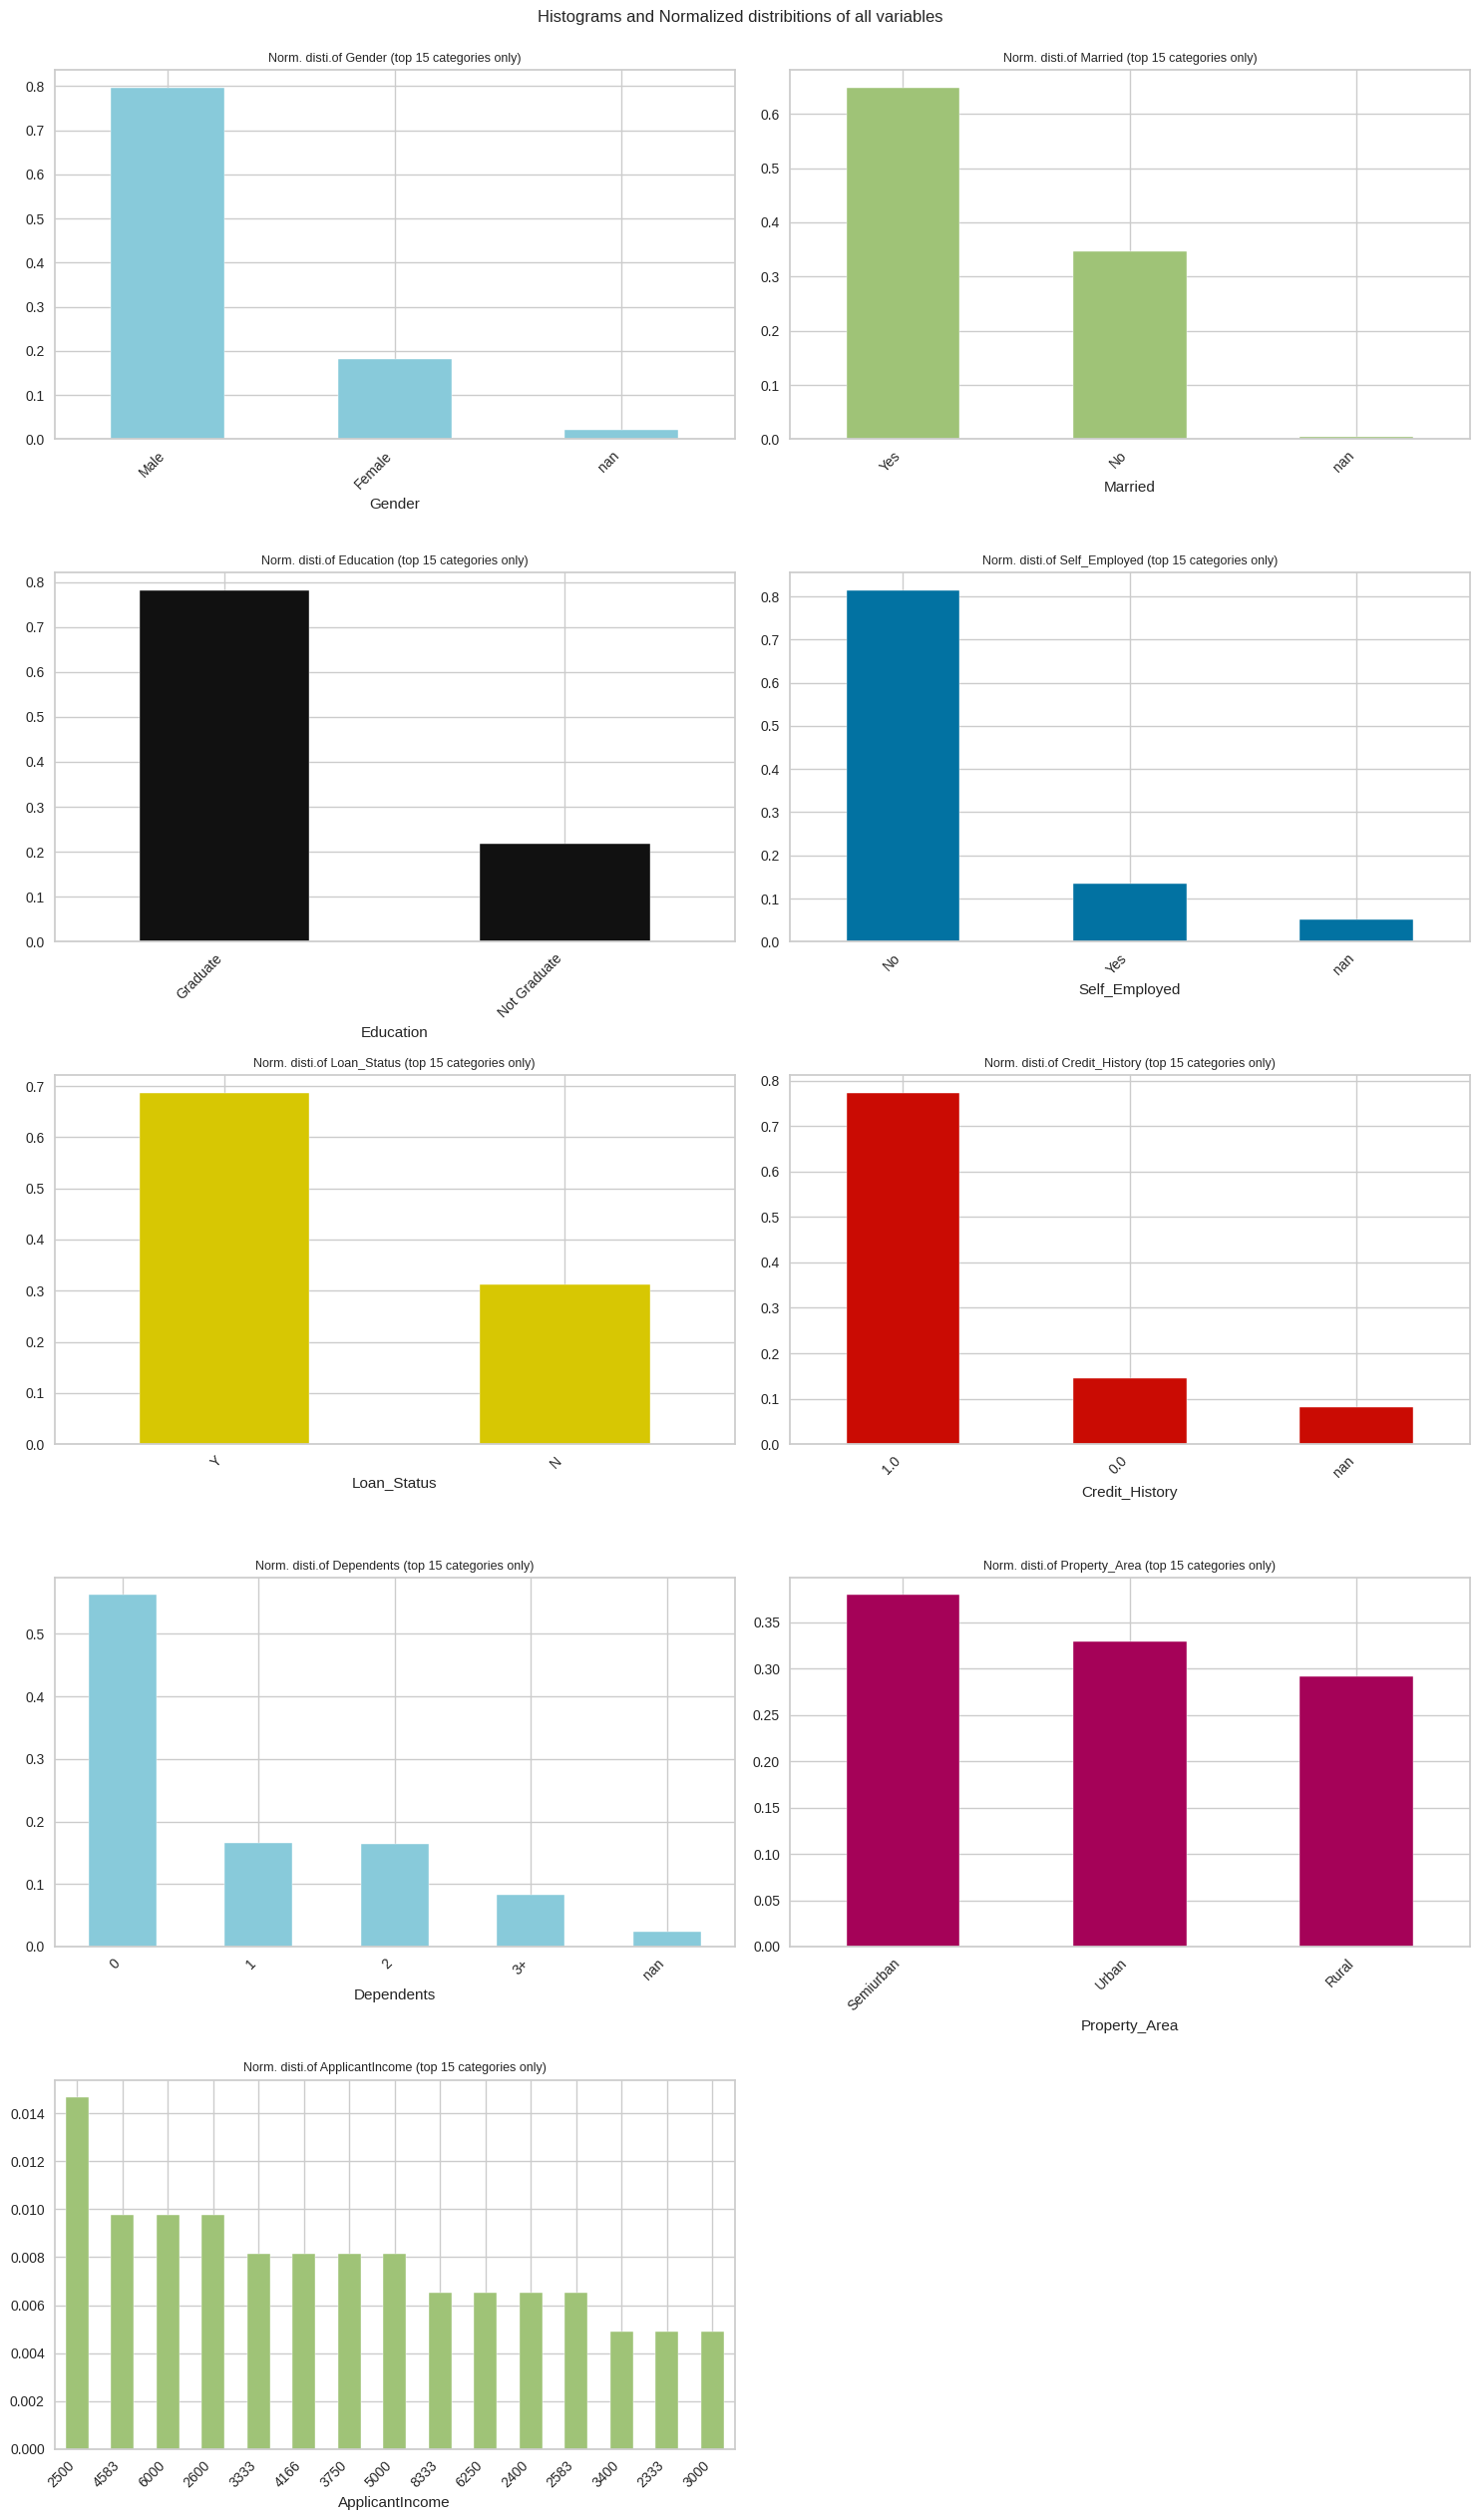

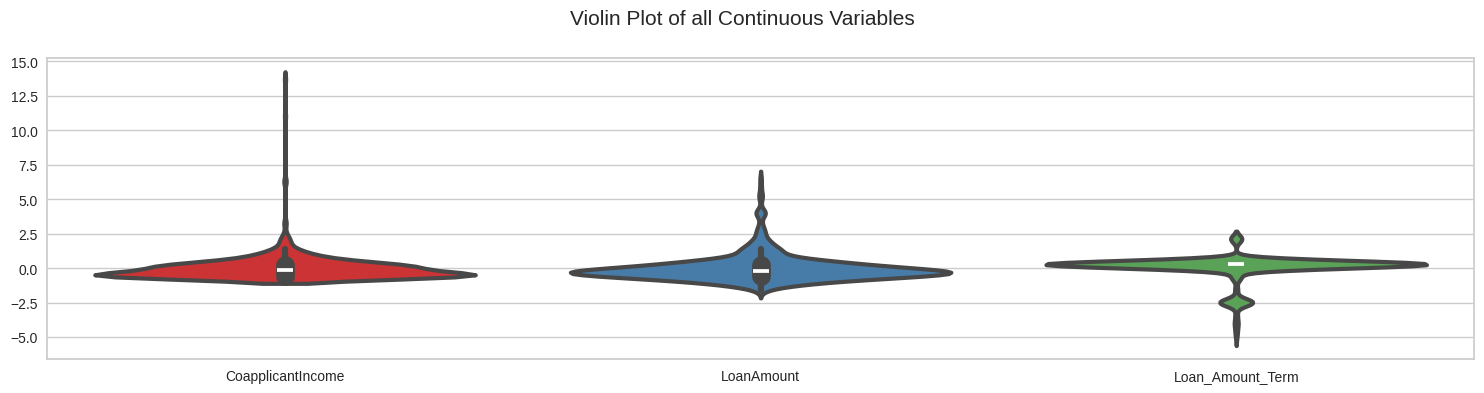

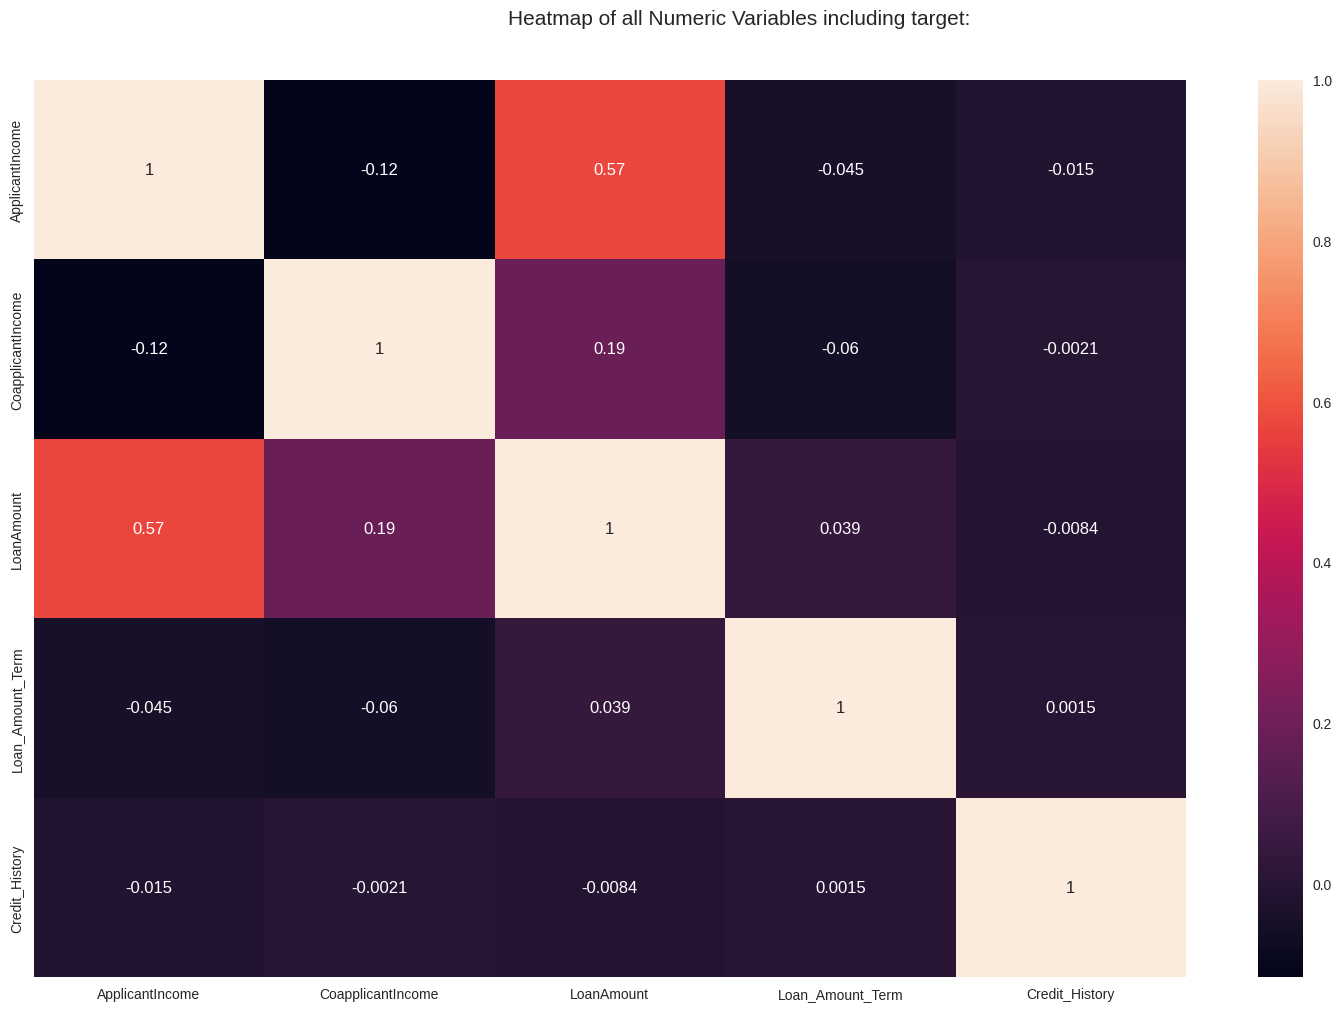

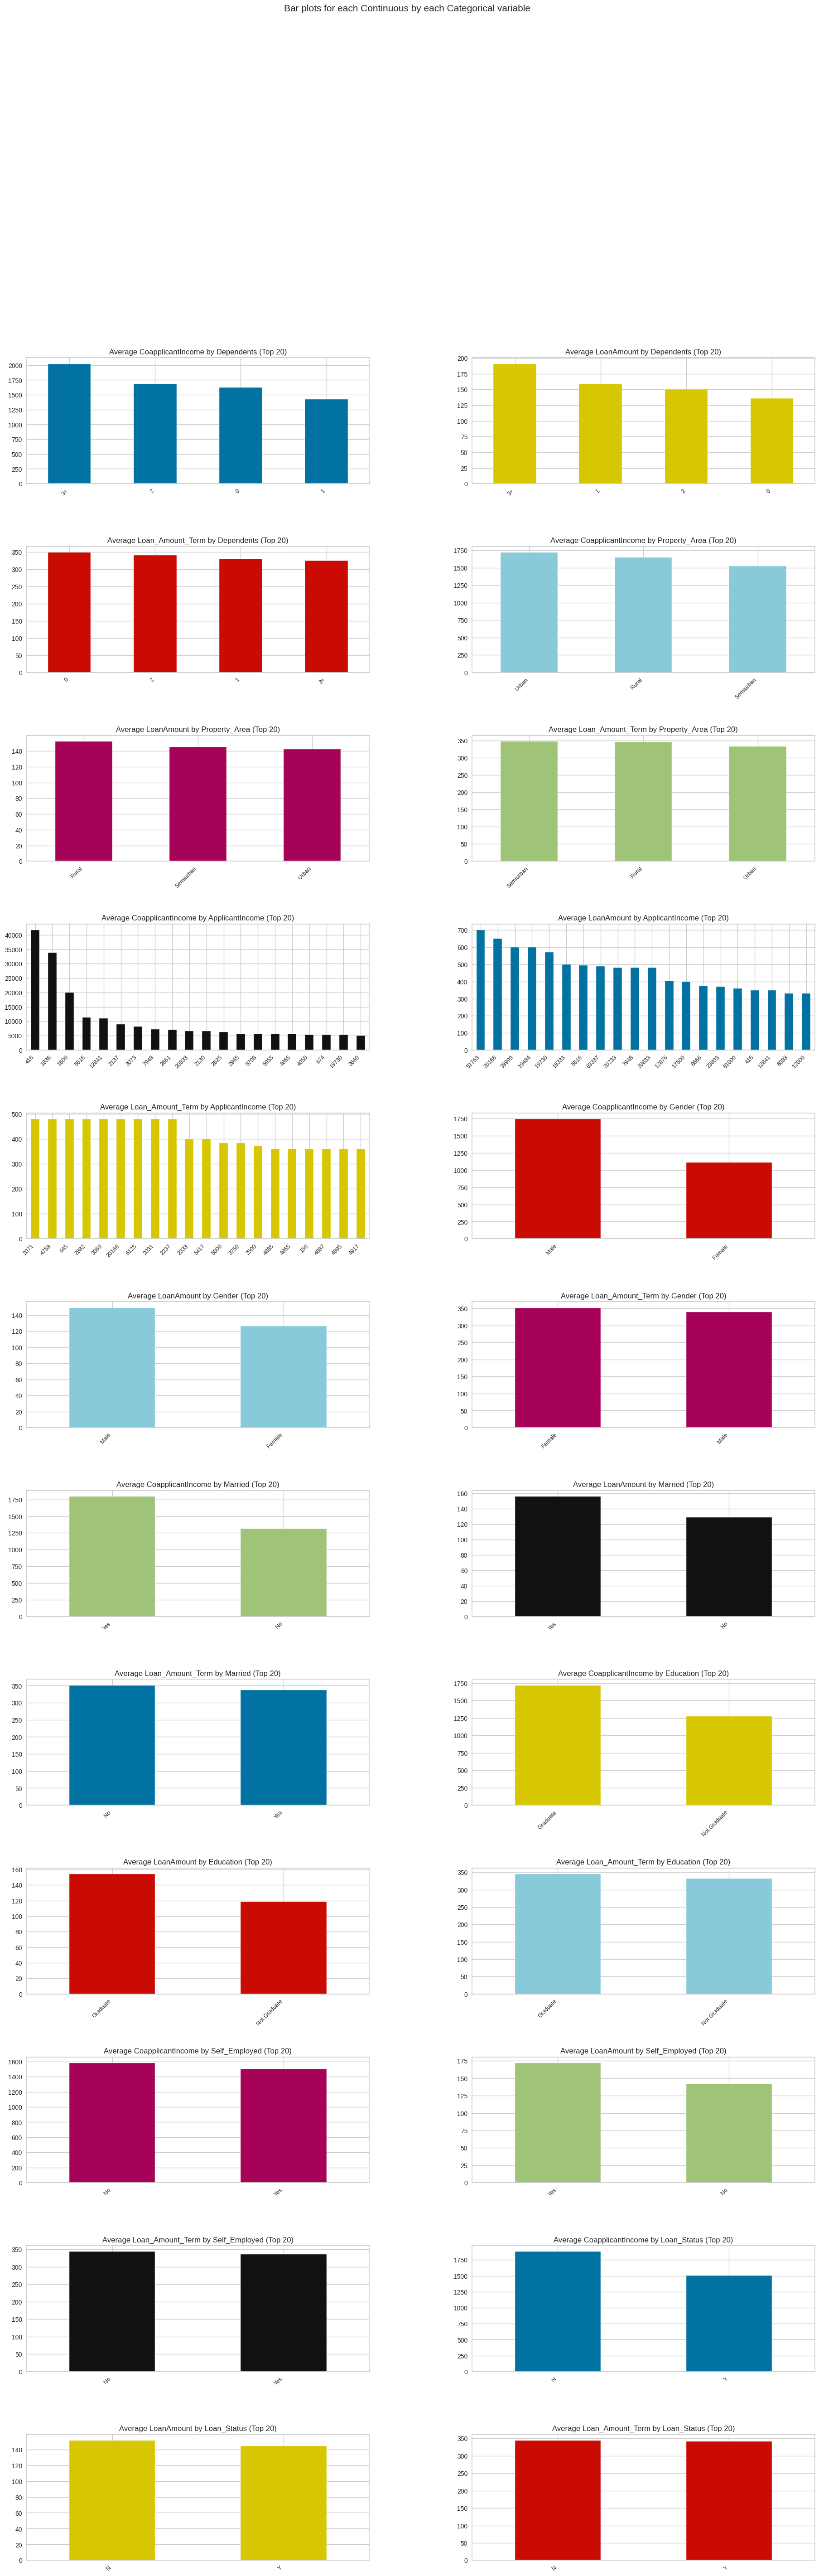

All Plots done
Time to run AutoViz = 14 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# AutoViz visualization
AV = AutoViz_Class()
auto_viz = AV.AutoViz('https://raw.githubusercontent.com/Ivasquez2003/Data-Mining-Project/refs/heads/main/train_u6lujuX_CVtuZ9i.csv')

# Preparing Data

In [ ]:
# Drop columns with many missing values or irrelevant
df_clean = df.drop(columns=['Loan_ID'])

# Fill missing values
df_clean['Gender'] = df_clean['Gender'].fillna(df_clean['Gender'].mode()[0])
df_clean['Married'] = df_clean['Married'].fillna(df_clean['Married'].mode()[0])
df_clean['Dependents'] = df_clean['Dependents'].fillna(df_clean['Dependents'].mode()[0])
df_clean['Self_Employed'] = df_clean['Self_Employed'].fillna(df_clean['Self_Employed'].mode()[0])
df_clean['LoanAmount'] = df_clean['LoanAmount'].fillna(df_clean['LoanAmount'].median())
df_clean['Loan_Amount_Term'] = df_clean['Loan_Amount_Term'].fillna(df_clean['Loan_Amount_Term'].mode()[0])
df_clean['Credit_History'] = df_clean['Credit_History'].fillna(df_clean['Credit_History'].mode()[0])

df_clean.dropna(inplace=True)
df_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Model

In [ ]:
# Setup PyCaret
clf1 = setup(data=df_clean, target='Loan_Status', session_id=123)

# Compare all models
compare_models()

#compare_models(include=['rf', 'xgboost'])

,Description,Value
0,Session id,123
1,Target,Loan_Status
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(614, 12)"
5,Transformed data shape,"(614, 17)"
6,Transformed train set shape,"(429, 17)"
7,Transformed test set shape,"(185, 17)"
8,Numeric features,5
9,Categorical features,6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8137,0.7505,0.8137,0.8356,0.7884,0.4903,0.5473,0.1370
lda,Linear Discriminant Analysis,0.8137,0.7490,0.8137,0.8356,0.7884,0.4903,0.5473,0.1410
lr,Logistic Regression,0.8114,0.7532,0.8114,0.8326,0.7862,0.4853,0.5412,1.2150
ada,Ada Boost Classifier,0.7951,0.7194,0.7951,0.7997,0.7780,0.4694,0.4996,0.3420
nb,Naive Bayes,0.7950,0.7433,0.7950,0.7996,0.7765,0.4629,0.4956,0.1420
rf,Random Forest Classifier,0.7904,0.7597,0.7904,0.7935,0.7717,0.4508,0.4822,0.3790
gbc,Gradient Boosting Classifier,0.7812,0.7178,0.7812,0.7760,0.7587,0.4192,0.4464,0.2840
xgboost,Extreme Gradient Boosting,0.7693,0.7645,0.7693,0.7637,0.7576,0.4208,0.4344,0.7030
lightgbm,Light Gradient Boosting Machine,0.7507,0.7519,0.7507,0.7418,0.7373,0.3724,0.3846,0.5160
et,Extra Trees Classifier,0.7367,0.7097,0.7367,0.7325,0.7284,0.3591,0.3675,0.4040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

# Evaluate

In [ ]:
# Create and evaluate a Random Forest model
rf_model = create_model('rf')
evaluate_model(rf_model)
predict_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8140,0.8077,0.8140,0.8212,0.7945,0.4926,0.5327
1,0.6977,0.6859,0.6977,0.6694,0.6733,0.1957,0.2058
2,0.7674,0.6436,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.7907,0.8449,0.7907,0.8390,0.7489,0.3828,0.4865
4,0.7907,0.8154,0.7907,0.7867,0.7882,0.4928,0.4936
5,0.7907,0.7241,0.7907,0.7888,0.7763,0.4749,0.4965
6,0.7907,0.7303,0.7907,0.7888,0.7763,0.4749,0.4965
7,0.8372,0.7734,0.8372,0.8448,0.8260,0.5916,0.6185
8,0.7674,0.6749,0.7674,0.7645,0.7466,0.4044,0.4330


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7892,0.7748,0.7892,0.8015,0.7622,0.4271,0.4797


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction_label,prediction_score
354,Female,Yes,0,Graduate,No,2423,505.0,130.0,360.0,1.0,Semiurban,Y,Y,0.97
426,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,N,Y,0.55
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Y,0.84
214,Male,Yes,0,Graduate,No,3173,3021.0,137.0,360.0,1.0,Urban,Y,Y,0.93
72,Male,No,0,Graduate,No,3500,0.0,81.0,300.0,1.0,Semiurban,Y,Y,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Male,Yes,3+,Graduate,No,6406,0.0,150.0,360.0,1.0,Semiurban,N,Y,0.84
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,1.0,Urban,Y,Y,0.62
50,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y,Y,0.97
189,Male,Yes,0,Graduate,No,9328,0.0,188.0,180.0,1.0,Rural,Y,Y,0.92
